to transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and color each data point with specific class.

In [12]:
# import libraries.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import numpy as np

In [8]:
iris = datasets.load_iris() # Bunch object
x= iris.data
y=iris.target

Original Normalized:
 [[0.80377277 0.55160877 0.22064351 0.0315205 ]
 [0.82813287 0.50702013 0.23660939 0.03380134]
 [0.80533308 0.54831188 0.2227517  0.03426949]
 [0.80003025 0.53915082 0.26087943 0.03478392]
 [0.790965   0.5694948  0.2214702  0.0316386 ]]
mean [5.84333333 3.054      3.75866667 1.19866667]


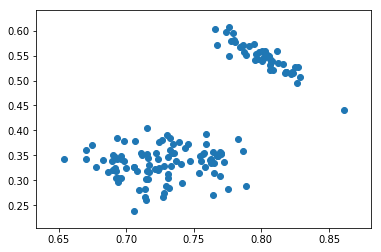

In [14]:
A=normalize(x)
print("Original Normalized:\n",A[:5,:])
print("mean",np.mean(x, axis=0))
plt.scatter(A[:,0], A[:,1])

In [16]:
pca2 = PCA(n_components=3) # two components
pca2.fit(A) # run PCA, putting in raw version for fun

print("Principal components:")
print(pca2.components_)

print("---")
print("Compressed ")
reduced = pca2.transform(A)
print(reduced[:5,:]) # first 5 obs

print("---")
print("Reconstructed - ")
print(pca2.inverse_transform(pca2.transform(A))[:5,:]) # first 5 obs
print("Original Normalized:\n",A[:5,:])

Principal components:
[[ 0.18551603  0.49356405 -0.76907046 -0.36126024]
 [ 0.59736363 -0.64895221 -0.05241948 -0.46826267]
 [-0.24786821  0.29408083  0.49494508 -0.77917083]]
---
Compressed 
[[ 0.30188671 -0.00060028 -0.00044426]
 [ 0.27129568  0.04098249 -0.01346995]
 [ 0.29793449  0.00107354 -0.00289906]
 [ 0.26292041  0.00161139  0.01419155]
 [ 0.30766011 -0.019957    0.00830746]]
---
Reconstructed - 
[[0.80737758 0.55403912 0.22259752 0.03253226]
 [0.82977115 0.50812465 0.23749743 0.03426116]
 [0.80825273 0.55028031 0.22433432 0.03508895]
 [0.79784213 0.53767559 0.25969334 0.03416979]
 [0.79471637 0.57202396 0.22350366 0.0326915 ]]
Original Normalized:
 [[0.80377277 0.55160877 0.22064351 0.0315205 ]
 [0.82813287 0.50702013 0.23660939 0.03380134]
 [0.80533308 0.54831188 0.2227517  0.03426949]
 [0.80003025 0.53915082 0.26087943 0.03478392]
 [0.790965   0.5694948  0.2214702  0.0316386 ]]


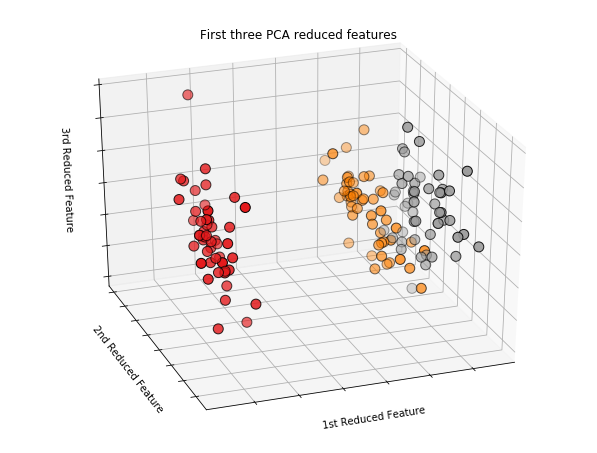

In [24]:

# For better understanding plot the first three PCA dimensions 
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

ax.scatter(reduced[:, 0], reduced[:, 1], reduced[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k', s=100)
ax.set_title("First three PCA reduced features")
ax.set_xlabel("1st Reduced Feature")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd Reduced Feature")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd Reduced Feature")
ax.w_zaxis.set_ticklabels([])
plt.show()